Dane wejściowe: 
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Zmienne objaśniające: 
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Opisywana zmienność:  [0.92461872 0.05306648 0.01710261 0.00521218]


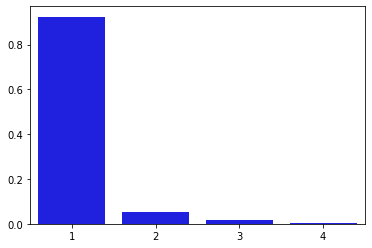


Wyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 2: 


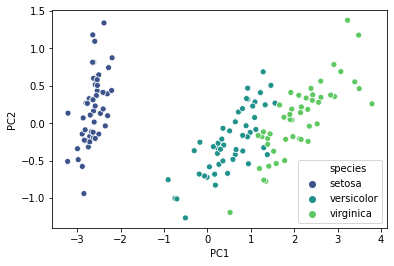

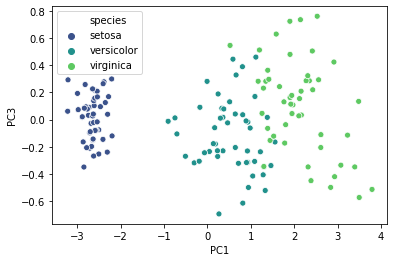

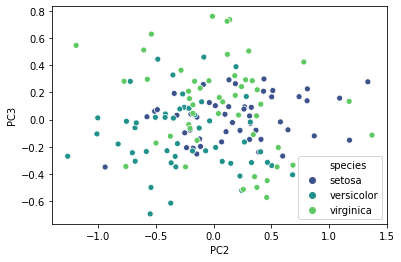

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA


iris = sns.load_dataset("iris") 
print('Dane wejściowe: \n', iris.head()) 
# Usunięcie kolumny 'species' - nie jest zmienną objaśniającą
X = iris.drop('species', 1) 
y = iris['species'] 
print('\nZmienne objaśniające: \n', X.head()) 

sc = StandardScaler()
sc.fit(X)
#X = sc.transform(X)

pca = PCA()
PC = pca.fit_transform(X)
# Analiza zmienności opisywanej przez poszczegółne PC
print('\nOpisywana zmienność: ', pca.explained_variance_ratio_) 
sns.barplot(np.arange(1,5), pca.explained_variance_ratio_,color='blue') 
plt.show()

print('\nWyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 2: ') 
sns.scatterplot(PC[:,0], PC[:,1], sizes=50, palette='viridis', hue=y) 
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.show() 

sns.scatterplot(PC[:,0], PC[:,2], sizes=50, palette='viridis', hue=y) 
plt.xlabel('PC1') 
plt.ylabel('PC3') 
plt.show() 

sns.scatterplot(PC[:,1], PC[:,2], sizes=50, palette='viridis', hue=y) 
plt.xlabel('PC2') 
plt.ylabel('PC3') 
plt.show() 

   par1  par2  par3  par4  group
0   7.9  12.1   2.1  19.1     10
1   9.4  13.4   1.9  18.8     10
2   8.5  11.8   1.7  21.1     10
3   1.2   3.7   6.3  55.2     30
4   8.8  14.3   7.7  58.4     20

Explained variance / %: 
 94.92
 4.97
 0.11
 0.01


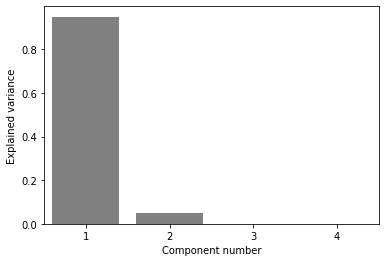

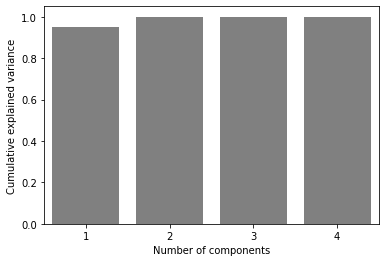


Component loadings :
        PC1   PC2
par1  0.13  0.49
par2  0.19  0.84
par3 -0.12  0.10
par4 -0.96  0.22


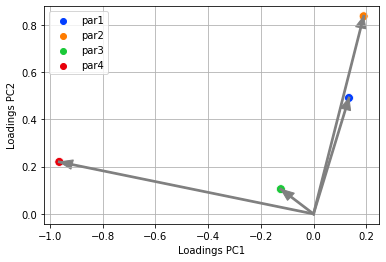


 Results :


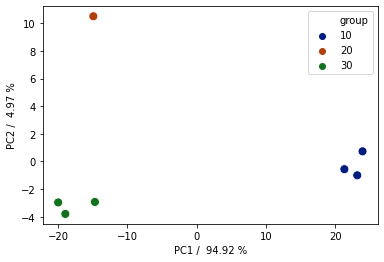

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA


dataset = pd.read_csv("pacjent.txt", delim_whitespace=True, header=0) 
print(dataset.head()) 
X = dataset.values[:,0:4] # Zmienne objaśniające
y = dataset['group'] 

scaler = StandardScaler() 
scaler.fit(X) 
#X = scaler.transform(X) # Autoskalowanie

pca = PCA(n_components=4) 
modelPC = pca.fit(X)

# Procent opisywanej zmienności w formie num. i wykresu słupkowego
print('\nExplained variance / %: ') 
for i in range(4): 
  print('% 4.2f' % (100*pca.explained_variance_ratio_)[i]) 
splot = sns.barplot(np.arange(1,5),pca.explained_variance_ratio_, color='grey') 
plt.xlabel('Component number') 
plt.ylabel('Explained variance') 
plt.show() 

# Skumulowana zmienność
sns.barplot(np.arange(1,5),np.cumsum(pca.explained_variance_ratio_), color='grey') 
plt.xlabel('Number of components') 
plt.ylabel('Cumulative explained variance') 
plt.show() 

#Wagi składowych
print('\nComponent loadings :')  
# Uwaga! Wagi dla poszczególnych składowych w wierszach
print('        PC1   PC2')
for i in range(4): 
  print(dataset.columns[i], '% 4.2f' % (modelPC.components_)[0,i], '% 4.2f' % (modelPC.components_)[1,i])
sns.scatterplot(modelPC.components_[0,:], modelPC.components_[1,:],hue=dataset.columns[0:4], palette='bright',s=80) 
for i in range(0,4): # Wektory wskazujące wagi składowych  
  ax=sns.lineplot([0,modelPC.components_[0,i]],[0,modelPC.components_[1,i]], color='grey', linewidth=2.7) 
  ax.arrow(0,0, modelPC.components_[0,i],modelPC.components_[1,i], lw=1,  color='grey',head_length=.05, head_width=.04, length_includes_head=True)
plt.xlabel('Loadings PC1') 
plt.ylabel('Loadings PC2') 
plt.grid() 
plt.show() 

# Rzut obiektów na płaszczyznę PC1/PC2
print('\n Results :') 
PC = modelPC.transform(X) 
sns.scatterplot(PC[:,0], PC[:,1], palette='dark', hue=y,legend='full', s=80) 
plt.xlabel('PC1 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[0]+ ' %') 
plt.ylabel('PC2 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[1]+ ' %')
plt.legend() 
plt.show()


   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]


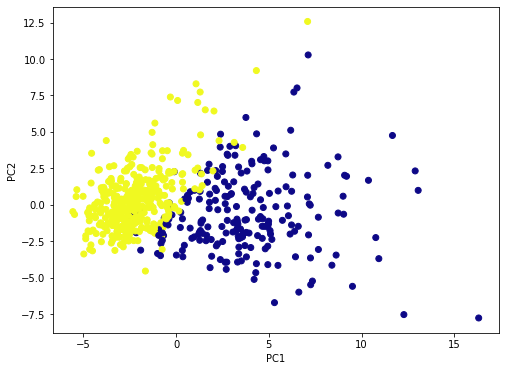

Loadings: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


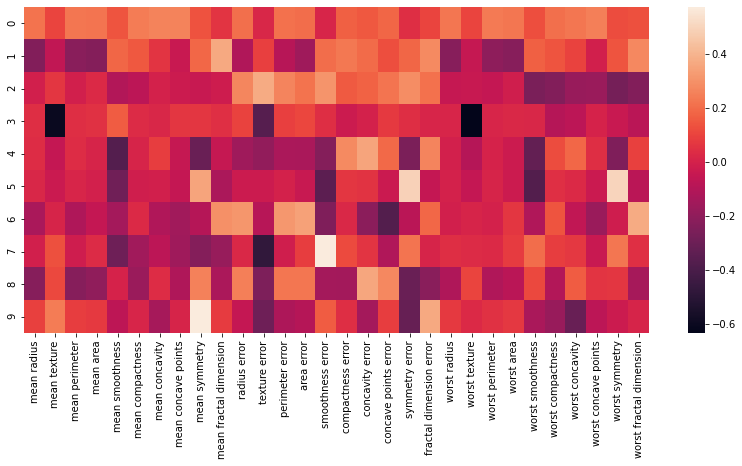

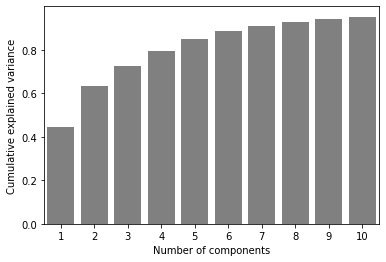


Explained variance / %: 
 44.27
 18.97
 9.39
 6.60
 5.50
 4.02
 2.25
 1.59
 1.39
 1.17


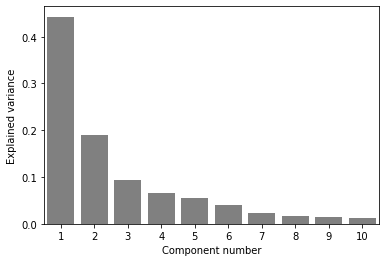

In [ ]:
# Dane do obliczeń
from sklearn.datasets import load_breast_cancer  
cancer = load_breast_cancer()  
# Opis danych
#print(cancer.DESCR) 
#print(cancer.target)
# Tworzenie ramki danych 
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

# Podgląd danych 
print(df.head())

#Autoskalowanie
scalar = StandardScaler()  
scalar.fit(df)  
scaled_data = scalar.transform(df)

# PCA 
from sklearn.decomposition import PCA  
pca = PCA(n_components = 10) # tutaj wybrano tylko dwie składowe 
pca.fit(scaled_data)  
x_pca = pca.transform(scaled_data)

plt.figure(figsize =(8, 6))  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma')  
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.show() 

# Wagi składowych (loadings == components_)
print('Loadings: ') 
print(pca.components_[0:2,:] ) 
df_comp = pd.DataFrame(pca.components_,columns = cancer['feature_names'])  
# Mapa cieplna - ładunki składowych
plt.figure(figsize =(14, 6)) 
sns.heatmap(df_comp) 

plt.figure()
sns.barplot(np.arange(1,11),np.cumsum(pca.explained_variance_ratio_), color='grey') 
plt.xlabel('Number of components') 
plt.ylabel('Cumulative explained variance') 
plt.show() 

print('\nExplained variance / %: ') 
for i in range(10): 
  print('% 4.2f' % (100*pca.explained_variance_ratio_)[i]) 
splot = sns.barplot(np.arange(1,11),pca.explained_variance_ratio_, color='grey') 
plt.xlabel('Component number') 
plt.ylabel('Explained variance') 
plt.show() 
